In [29]:
from PIL import Image
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

def load_and_prepare_image(image_path, processor):
    image = Image.open(image_path).convert("RGB")
    # Resize and preprocess the image as required by the model
    image = image.resize((256, 256))  # Resize to the size expected by the model
    return processor(images=image, return_tensors="pt").pixel_values

def generate_caption(image_path, model, processor, device):
    # Load and prepare image
    pixel_values = load_and_prepare_image(image_path, processor).to(device)

    # Generate captions
    model.eval()
    with torch.no_grad():
        outputs = model.generate(pixel_values=pixel_values)
        caption = processor.decode(outputs[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    return caption

# Path to your image
image_path = "/Users/bryanjangeesingh/Documents/PersonReID/Market-Pytorch/Market/train/0202/0202_c3s3_033078_04.jpg"
# Load the processor and model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
model.load_state_dict(torch.load('/Users/bryanjangeesingh/Documents/PersonReID/finetuning_weights_20_epochs_20000.pth', map_location=torch.device('cpu')))

# Set device
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

# Generate and print caption
caption = generate_caption(image_path, model, processor, device)
print(f"Generated Caption: {caption}")


Generated Caption: long sleeve wool blazer in black. notched lapel collar. breast pocket. two -


(256, 256, 3)


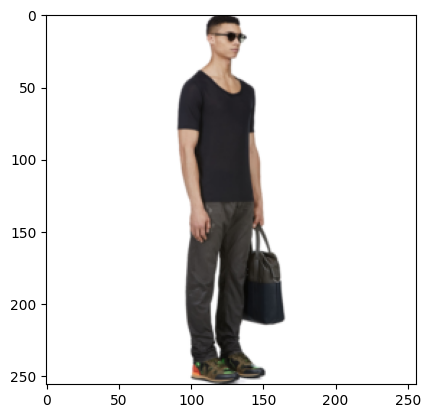

In [17]:
import h5py
import matplotlib.pyplot as plt# Open the .h5 file
with h5py.File('/Users/bryanjangeesingh/Downloads/fashion_gen/fashiongen_256_256_train.h5', 'r') as h5_file:
    # Access the 'input_image' dataset
    input_image_data = h5_file['input_image']
    
    # Retrieve the data at the specified index
    idx = 23  # Replace with the desired index
    image_data = input_image_data[idx]

plt.imshow(image_data)
print(image_data.shape)

## Google DePlot VQA

In [8]:
from transformers import Pix2StructProcessor, Pix2StructForConditionalGeneration
import requests
from PIL import Image

processor = Pix2StructProcessor.from_pretrained('google/deplot')
model = Pix2StructForConditionalGeneration.from_pretrained('google/deplot')

url = "https://lastfm.freetls.fastly.net/i/u/770x0/d2ea4906458484286d241ce17912ddad.jpg#d2ea4906458484286d241ce17912ddad"
image = Image.open(requests.get(url, stream=True).raw)

inputs = processor(images=image, text="Describe this image", return_tensors="pt")
predictions = model.generate(**inputs, max_new_tokens=512)
print(processor.decode(predictions[0], skip_special_tokens=False))


<pad> Entity | Value <0x0A> describe this image | 1 <0x0A> nan | 1 <0x0A> Dece708 | 33 <0x0A> Nov17 | 5</s>


## InternLM-XComposer2

In [13]:
import torch
from transformers import AutoModel, AutoTokenizer

torch.set_grad_enabled(False)

# init model and tokenizer
model = AutoModel.from_pretrained('internlm/internlm-xcomposer2-vl-7b', trust_remote_code=True).cuda().eval()
tokenizer = AutoTokenizer.from_pretrained('internlm/internlm-xcomposer2-vl-7b', trust_remote_code=True)

query = '<ImageHere>Please describe this image in detail.'
image = "/Users/bryanjangeesingh/Downloads/Travis-Scott-astroworld-2021-billboard-1548.jpeg"
with torch.cuda.amp.autocast():
  response, _ = model.chat(tokenizer, query=query, image=image, history=[], do_sample=False)
print(response)
#The image features a quote by Oscar Wilde, "Live life with no excuses, travel with no regret,"
# set against a backdrop of a breathtaking sunset. The sky is painted in hues of pink and orange,
# creating a serene atmosphere. Two silhouetted figures stand on a cliff, overlooking the horizon.
# They appear to be hiking or exploring, embodying the essence of the quote.
# The overall scene conveys a sense of adventure and freedom, encouraging viewers to embrace life without hesitation or regrets.


You are using a model of type internlmxcomposer2 to instantiate a model of type internlm. This is not supported for all configurations of models and can yield errors.


ValueError: The model class you are passing has a `config_class` attribute that is not consistent with the config class you passed (model has <class 'transformers_modules.internlm.internlm-xcomposer2-vl-7b.31f7ce38324238217211dfa87568a22dcaf44ec8.configuration_internlm_xcomposer2.InternLMXcomposer2Config'> and you passed <class 'transformers_modules.internlm.internlm-xcomposer2-vl-7b.31f7ce38324238217211dfa87568a22dcaf44ec8.configuration_internlm_xcomposer2.InternLMXcomposer2Config'>. Fix one of those so they match!